Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para 
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada 
de Fourier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import cv2 as cv

def create_gauss_filter(h, w, k_size, sigma):
    gaussian_array = (1/(2*np.pi*sigma**2)) * np.exp(-((np.linspace(-(k_size - 1) / 2., (k_size - 1) / 2., k_size))**2)/(2*sigma**2))  #aplicando formula de filtro gausiano
    kernel = gaussian_array.reshape((1, -1)) * gaussian_array.reshape((-1, 1))
    rows_padding = int((h - k_size) / 2)
    cols_padding = int((w - k_size) / 2)

    kernel_pad = np.pad(kernel / np.sum(kernel),
        [
            (rows_padding, rows_padding if (h - k_size) % 2 == 0 else rows_padding + 1),
            (cols_padding, cols_padding if (w - k_size) % 2 == 0 else cols_padding + 1)
        ]
    )
    kernel_fft=np.fft.fft2(kernel_pad)

    return kernel_pad, kernel_fft

Graficar ambas representaciones para diferentes tamaños de kernel y sigma, Aplicar el filtro una 
imagen para validar el funcionamiento en el dominio espectral.

Graficos a nivel Espacial

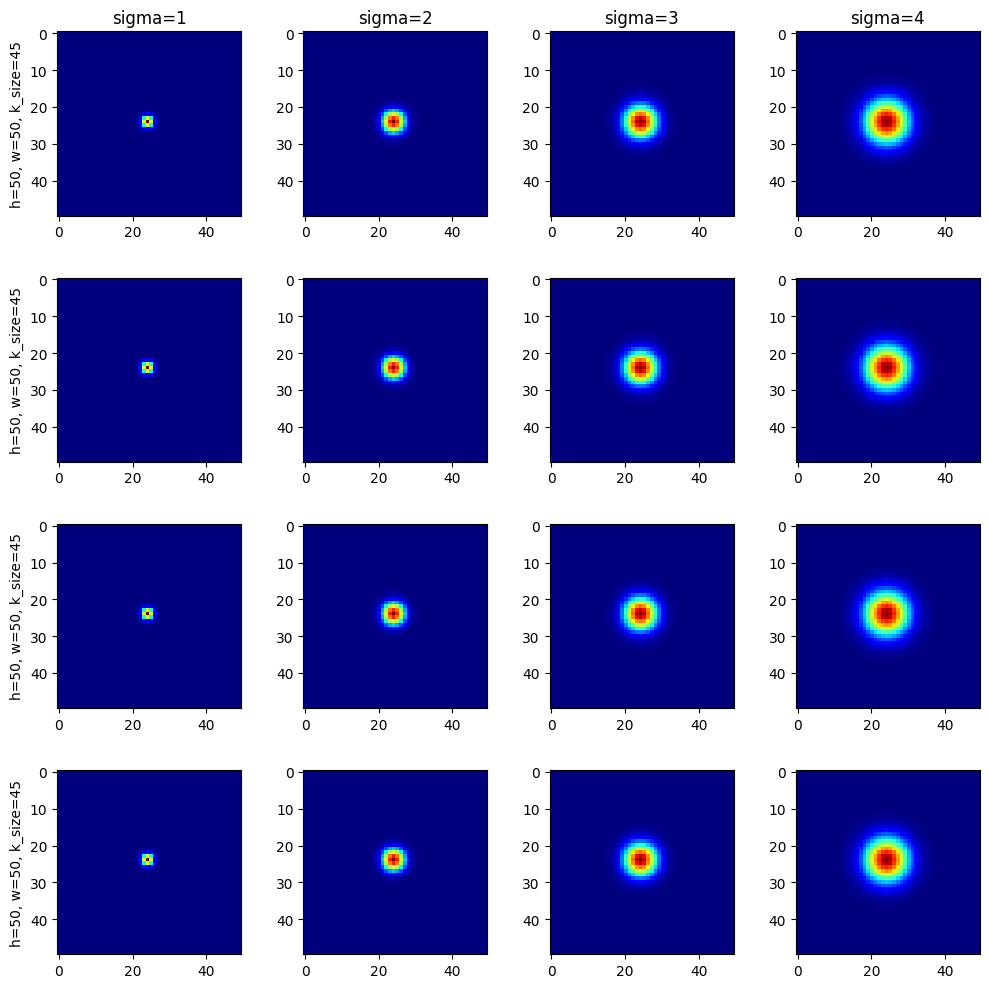

In [2]:
h=50
w=50
k_sizes = [5, 15, 35, 45]  # Tamaños de kernel
sigmas = [1, 2, 3, 4]  # Valores de sigma

figure, ax = plt.subplots(len(k_sizes), len(sigmas))
figure.set_figwidth(10)
figure.set_figheight(10)
plt.tight_layout()

for row, size in enumerate(k_sizes):
    for col, sigma in enumerate(sigmas):
        k_size = k_sizes[col]
        sigma = sigmas[col]
        kernel, ft_kernel = create_gauss_filter(h, w, k_size, sigma)
        ax[row][col].imshow(kernel, cmap='jet')
        ax[0][col].set_title(f'sigma={sigma}')
        ax[row][0].set_ylabel(f'h={h}, w={w}, k_size={k_size}')

Graficos a nivel Espectral

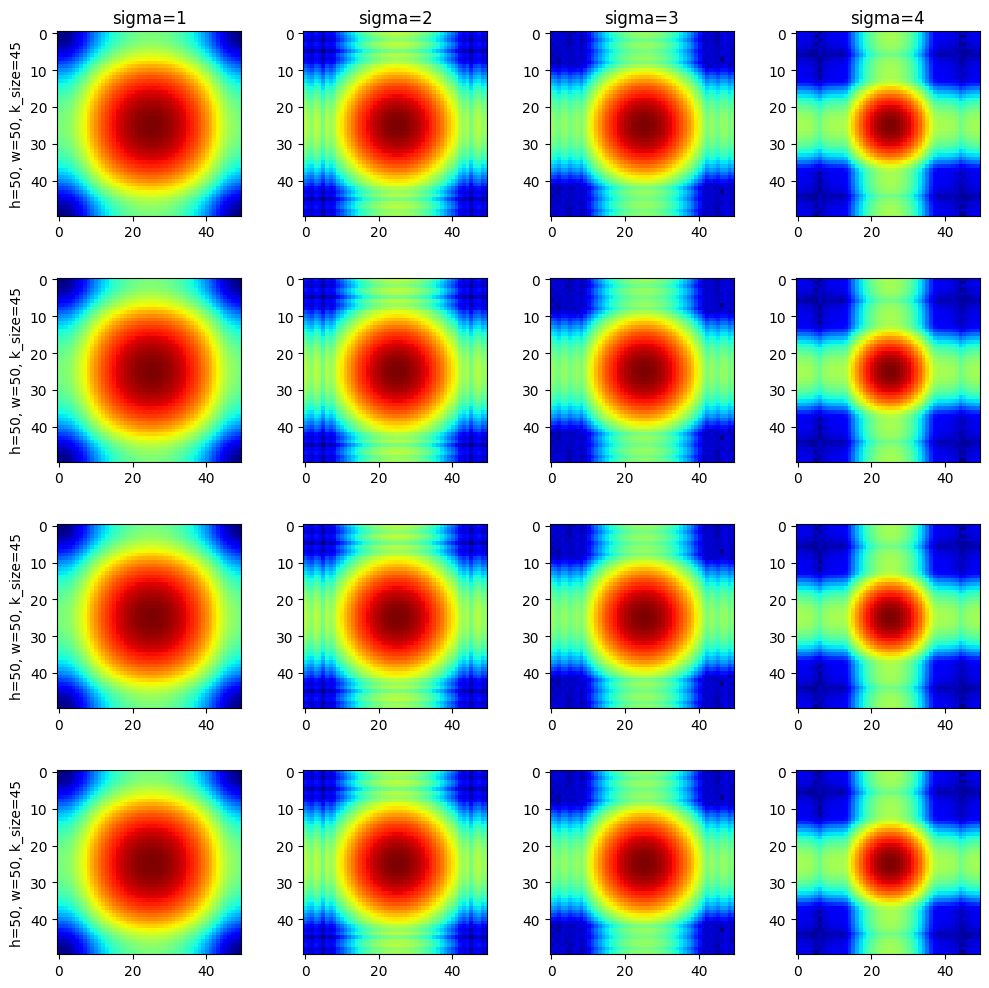

In [3]:
h=50
w=50
k_sizes = [5, 15, 35, 45]  # Tamaños de kernel
sigmas = [1, 2, 3, 4]  # Valores de sigma

figure, ax = plt.subplots(len(k_sizes), len(sigmas))
figure.set_figwidth(10)
figure.set_figheight(10)
plt.tight_layout()

for row, size in enumerate(k_sizes):
    for col, sigma in enumerate(sigmas):
        k_size = k_sizes[col]
        sigma = sigmas[col]
        kernel, ft_kernel = create_gauss_filter(h, w, k_size, sigma)
        ax[row][col].imshow(np.log(np.abs(fftshift(ft_kernel))), cmap='jet')
        ax[0][col].set_title(f'sigma={sigma}')
        ax[row][0].set_ylabel(f'h={h}, w={w}, k_size={k_size}')

GraficarPlotear el filtro en el dominio espectral imagen, para k_size=15 y para sigma=1

Text(0.5, 1.0, 'Imagen original escala de grises')

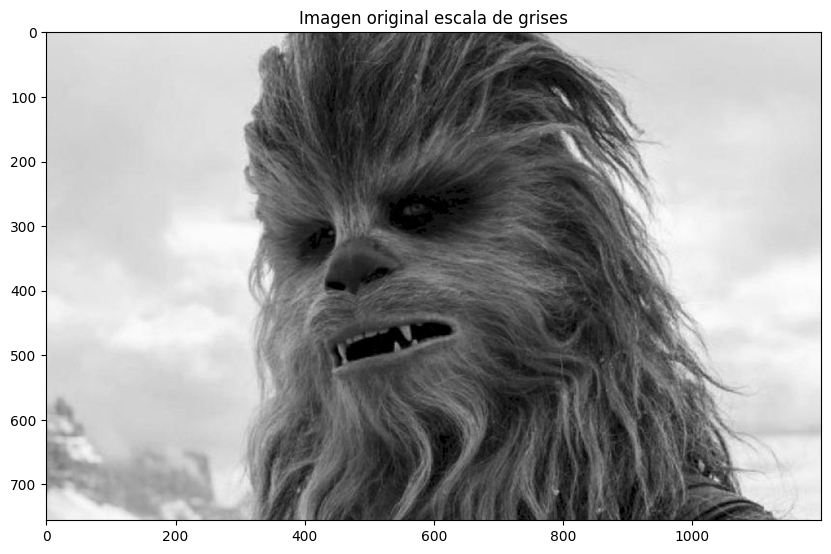

In [4]:
img = cv.imread('./Images/chewbacca1.png', cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 8))
plt.imshow(img, cmap='gray')
plt.title('Imagen original escala de grises')

Text(0.5, 1.0, 'Filtro en Dominio espectral')

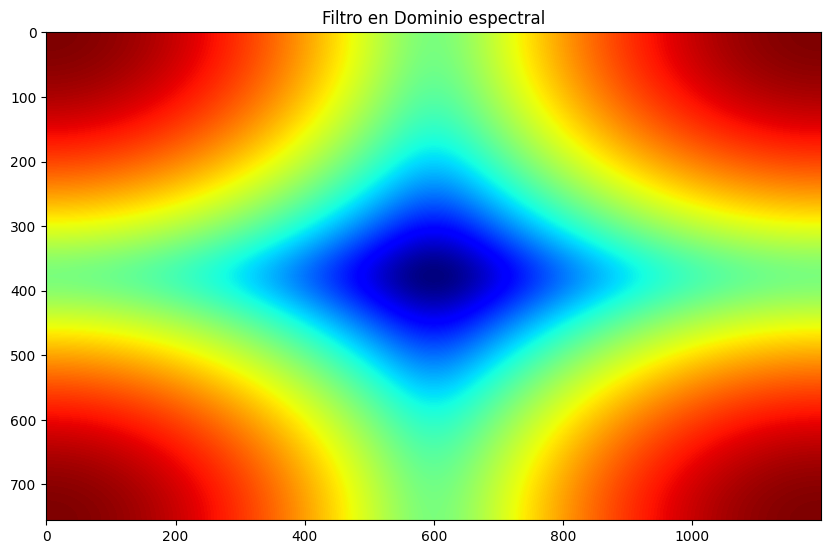

In [5]:
img = cv.imread('./Images/chewbacca1.png', cv.IMREAD_GRAYSCALE)
kernel, ft_kernel = create_gauss_filter(h=img.shape[0], w=img.shape[1], k_size=15, sigma=1)

plt.figure(figsize=(10, 8))
plt.imshow(np.log(np.abs(ft_kernel)), cmap='jet')
plt.title('Filtro en Dominio espectral')


Imagen cn distintos Kernei sizes y sigmas

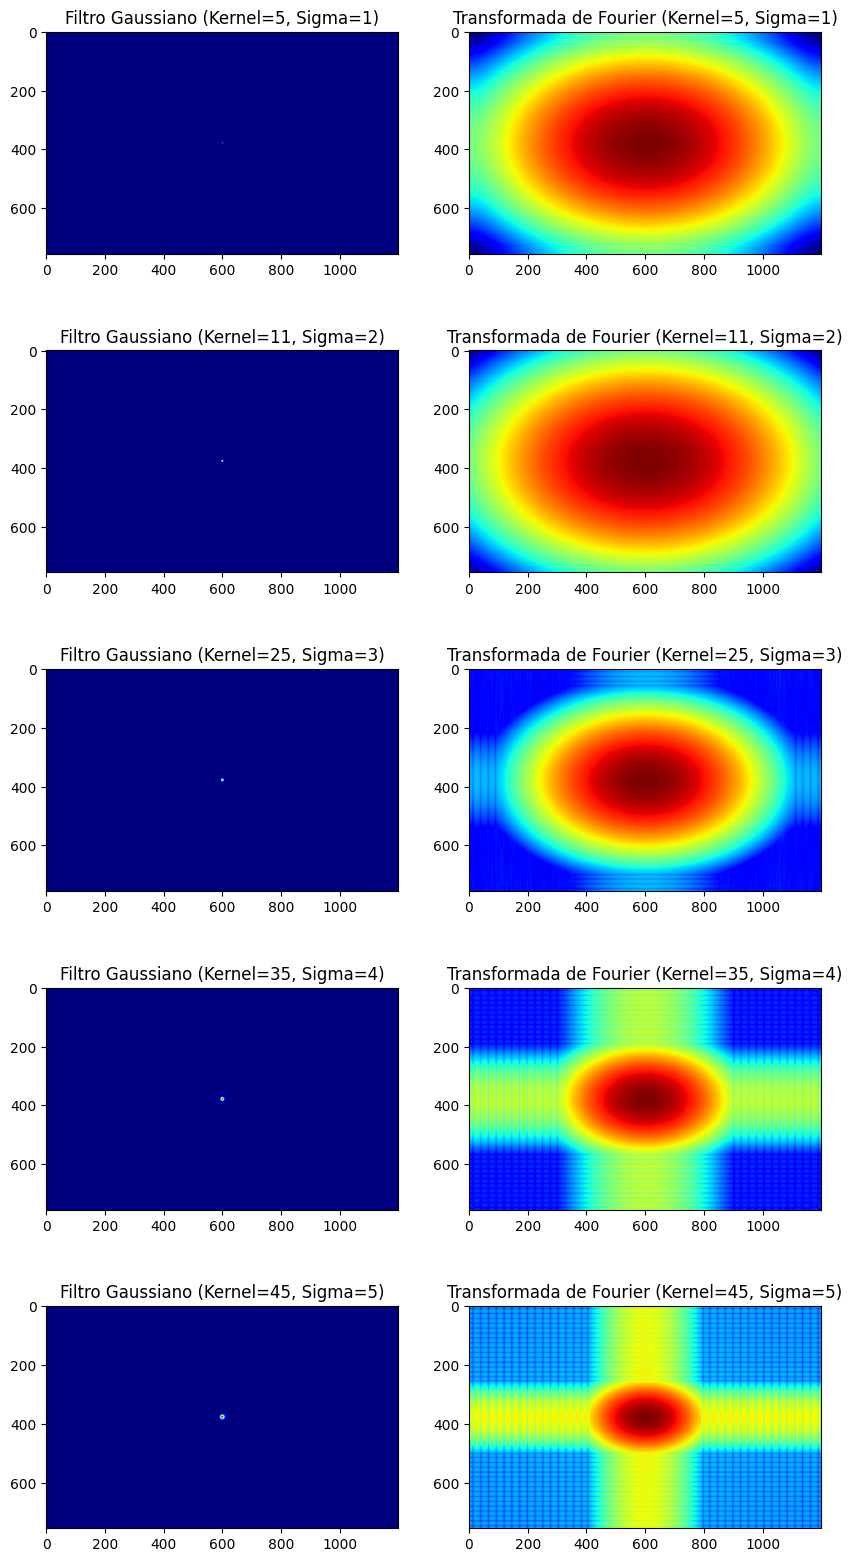

In [6]:

h, w = img.shape[0], img.shape[1]
k_sizes = [5, 11, 25, 35, 45]  # Tamaños de kernel
sigma_array = [1, 2, 3, 4, 5]  # Valores de sigma
fig, ax = plt.subplots(len(sigma_array),2, figsize=(10,20))

for k_size in k_sizes:  #iterar sobre los para
    for sigma in sigma_array:
        gauss_filter, fft_gauss_filter = create_gauss_filter(h, w, k_size, sigma)
        ax[sigma-1][0].imshow(gauss_filter, cmap='jet')
        ax[sigma-1][0].set_title(f'Filtro Gaussiano (Kernel={k_sizes[sigma-1]}, Sigma={sigma})')
        ax[sigma-1][1].imshow(np.log(np.abs(fftshift(fft_gauss_filter))), cmap='jet')
        ax[sigma-1][1].set_title(f'Transformada de Fourier (Kernel={k_sizes[sigma-1]}, Sigma={sigma})')

validacion sobre imagenes

Kernel=15
sigma=1

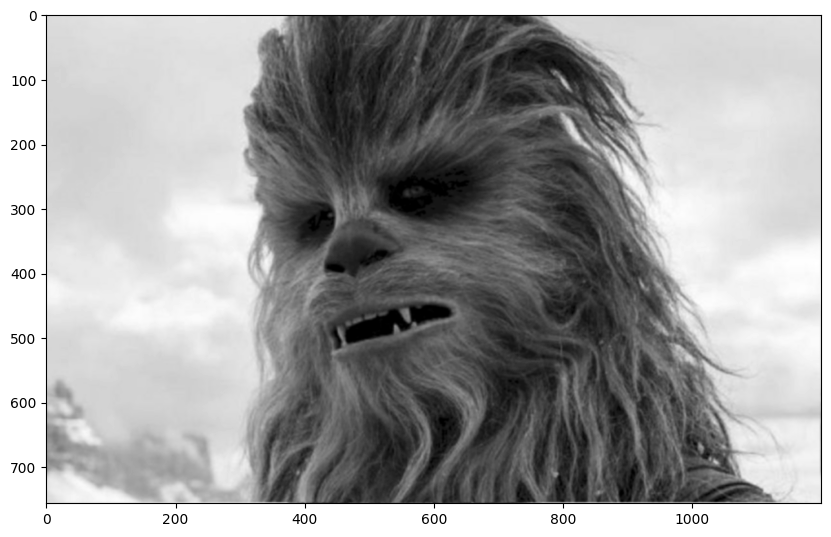

In [7]:
kernel1, ft_kernel1 = create_gauss_filter(img.shape[0], img.shape[1],15,1)

img_fft = fft2(img)
filtered = img_fft * ft_kernel1

img_final = ifftshift(np.real(ifft2(filtered)))

plt.figure(figsize=(10, 8))
plt.imshow(img_final, cmap='gray')

Kernel=31
sigma=2

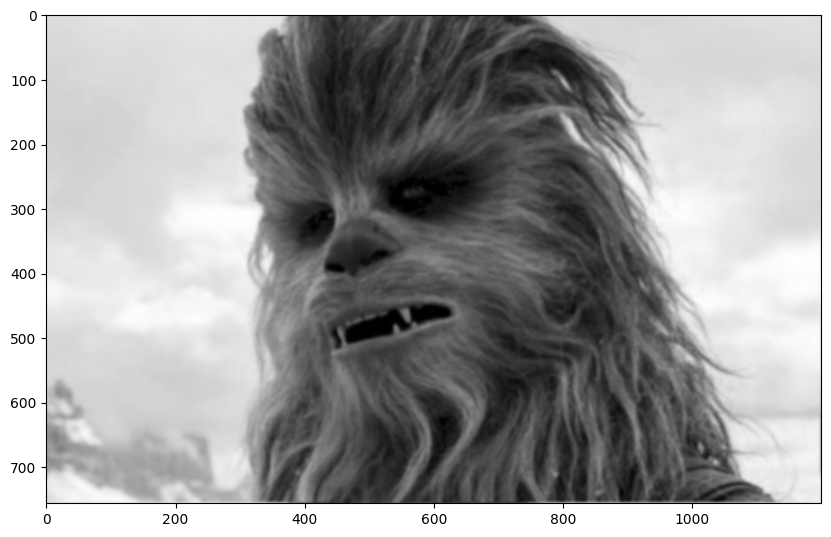

In [13]:
kernel2, ft_kernel2 = create_gauss_filter(img.shape[0], img.shape[1],31,2)

img_fft = fft2(img)
filtered = img_fft * ft_kernel2

img_final = ifftshift(np.real(ifft2(filtered)))

plt.figure(figsize=(10, 8))
plt.imshow(img_final, cmap='gray')

Kernel=45
sigma=3

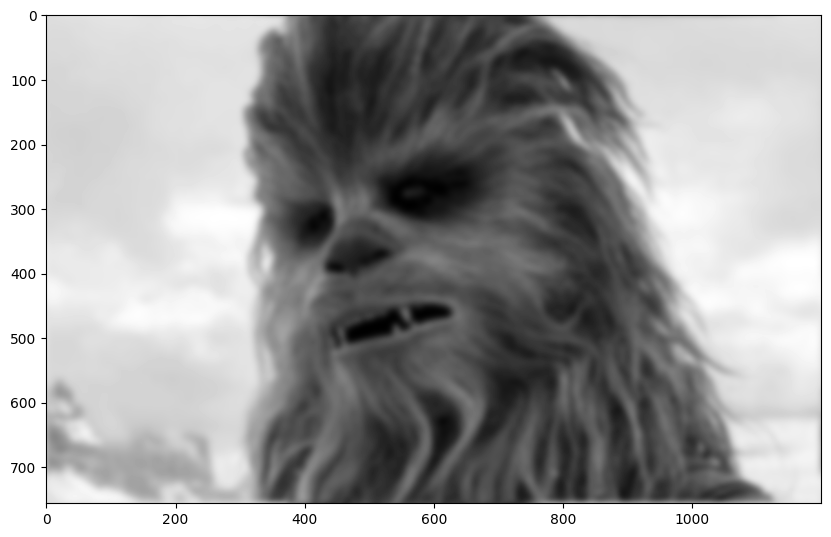

In [15]:
kernel2, ft_kernel3 = create_gauss_filter(img.shape[0], img.shape[1],45,5)

img_fft = fft2(img)
filtered = img_fft * ft_kernel3

img_final = ifftshift(np.real(ifft2(filtered)))

plt.figure(figsize=(10, 8))
plt.imshow(img_final, cmap='gray')

### 2-Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.


In [10]:
import numpy as np
from numpy.fft import fft2, ifft2, ifftshift, fftshift
import cv2 as cv

#creando funcion
def get_image_quality_meas(img):
    fft_img = np.fft.fft2(img)  #encontrando transformada
    fc = np.fft.fftshift(fft_img)
    afc = np.abs(fc)
    max_afc = np.max(afc)
    threshold = max_afc / 1000.0 
    Th = np.sum(afc > threshold)  
    x, y = img.shape   # Calculate Image Quality Measure (FM)
    QI = Th / (x * y)

    return QI

In [11]:
#creando funcion paraa evaluar FM para espectral y convolucional teniendo la desviacion estandar como entrada
def quality_measure_esp_conv(std_dev):
    img2= cv.imread('./Images/chewbacca1.png', cv.IMREAD_GRAYSCALE)
    h, w = img2.shape[0], img2.shape[1]
    kernel_size = 10
    kernel_espectral, ft_kernel_espectral = create_gauss_filter(h, w, kernel_size, std_dev)
    imag_fft = fft2(img2)
    img_blur_fft = imag_fft * ft_kernel_espectral  # fft inversa para blur
    img_blur = np.abs(ifft2(img_blur_fft ))
    quality_measure_espectral = get_image_quality_meas(img_blur)
    kernel_conv_tmp = cv.getGaussianKernel(kernel_size, std_dev)
    kernel_conv_tem2 = kernel_conv_tmp @ kernel_conv_tmp.T  
    img_blur = cv.filter2D(img2, -1, kernel_conv_tem2)
    quality_measure_conv = get_image_quality_meas(img_blur)
    return quality_measure_espectral,  quality_measure_conv

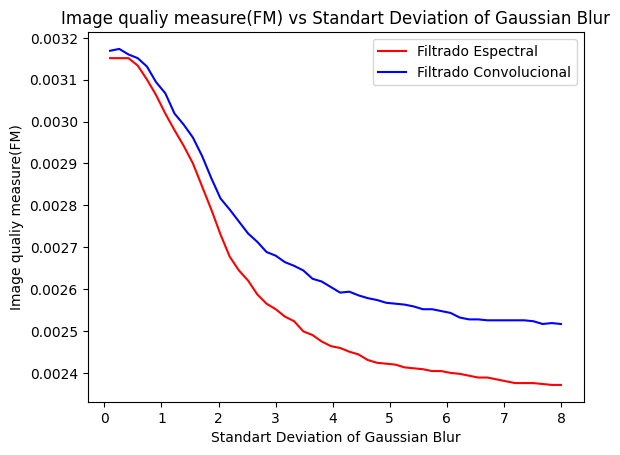

In [12]:
# Generar datos para la desviación estándar y para los datos de filtrado espectral y convolucional
std_dev_values = np.linspace(0.1, 8, 50)

qua_val_espectral_std=[]
qua_val_conv_std=[]
for std_dev in std_dev_values:
               qua_val_espectral_std_idx, qua_val_conv_std_idx=quality_measure_esp_conv(std_dev)             
               qua_val_espectral_std.append(qua_val_espectral_std_idx) 
               qua_val_conv_std.append(qua_val_conv_std_idx)
plt.plot(std_dev_values, qua_val_espectral_std, label='Filtrado Espectral',color='red')
plt.plot(std_dev_values, qua_val_conv_std, label='Filtrado Convolucional',color='blue')
plt.xlabel('Standart Deviation of Gaussian Blur')
plt.ylabel('Image qualiy measure(FM)')
plt.title('Image qualiy measure(FM) vs Standart Deviation of Gaussian Blur')
plt.legend()
plt.show()


- Segun la comparacion la calidad de la imagen se degrada segun se incrementa la desviacion estandar,
- cuando aumenta el desenfoque imagen, la calidad de la imagen disminuye
- El filtrado convolucional presenta un mejor desempeño con respecto a el filtrado espectral cuando se incrementa el desvio estandar.